In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix

In [28]:
df=pd.read_csv('C://Users//USER//Documents//bosch_price_updated.csv')

In [29]:
# Check for missing values
print(df.isnull().sum())

# Basic data cleaning (e.g., fill or drop missing values)
df.dropna(inplace=True)


product_id             0
product_category       0
region                 0
current_price          0
demand_forecast        0
inventory_level        0
manufacturing_cost     0
supply_chain_cost      0
profit_margin          0
optimization_result    0
production_time        0
inventory_turnover     0
order_lead_time        0
supply_chain_risk      0
dtype: int64


In [30]:
# Standardize numerical features for better model performance
scaler = StandardScaler()
numerical_features = ['current_price', 'demand_forecast', 'inventory_level', 'manufacturing_cost', 'supply_chain_cost']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [31]:
# Feature engineering: Calculate cost per unit and profit margin percentage
df['cost_per_unit'] = df['manufacturing_cost'] + df['supply_chain_cost']
df['profit_margin_percentage'] = df['profit_margin'] / df['current_price']

In [32]:
# Manufacturing Process optimization 
# Regression model to predict production time
X = df[['demand_forecast', 'inventory_level', 'manufacturing_cost', 'supply_chain_cost']]
y = df['production_time']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = reg_model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Coefficients for interpretation
print("Regression Coefficients:", reg_model.coef_)


Mean Squared Error: 6.695393297892724
Regression Coefficients: [ 0.0205774   0.07132925  0.0062078  -0.01330405]


C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


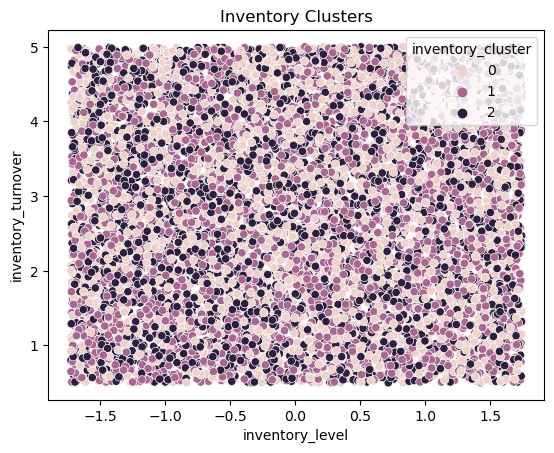

In [33]:
# inventory management optimization 
# Clustering to optimize inventory management
inventory_features = df[['inventory_level', 'inventory_turnover', 'order_lead_time']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['inventory_cluster'] = kmeans.fit_predict(inventory_features)

# Visualize clusters
sns.scatterplot(x='inventory_level', y='inventory_turnover', hue='inventory_cluster', data=df)
plt.title('Inventory Clusters')
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.37      0.35       651
           1       0.33      0.31      0.32       662
           2       0.34      0.34      0.34       687

    accuracy                           0.34      2000
   macro avg       0.34      0.34      0.34      2000
weighted avg       0.34      0.34      0.34      2000

Confusion Matrix:
 [[240 192 219]
 [234 202 226]
 [238 218 231]]


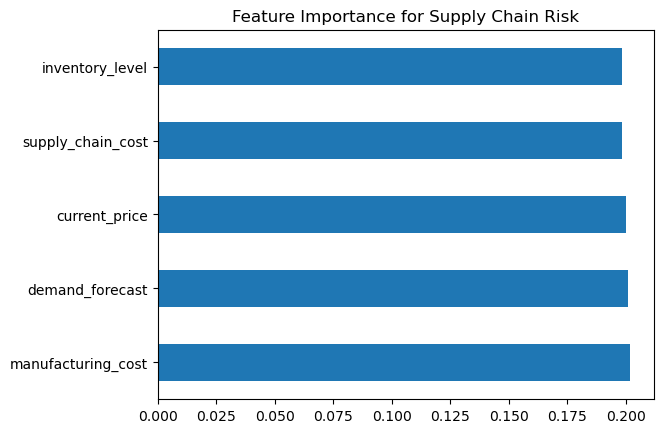

In [34]:
#Supply Chain Operations Optimization (Classification)
# Convert categorical features to numerical (e.g., 'supply_chain_risk')
df['supply_chain_risk'] = df['supply_chain_risk'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Classification model to predict supply chain risk
X = df[['current_price', 'demand_forecast', 'inventory_level', 'manufacturing_cost', 'supply_chain_cost']]
y = df['supply_chain_risk']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.title('Feature Importance for Supply Chain Risk')
plt.show()


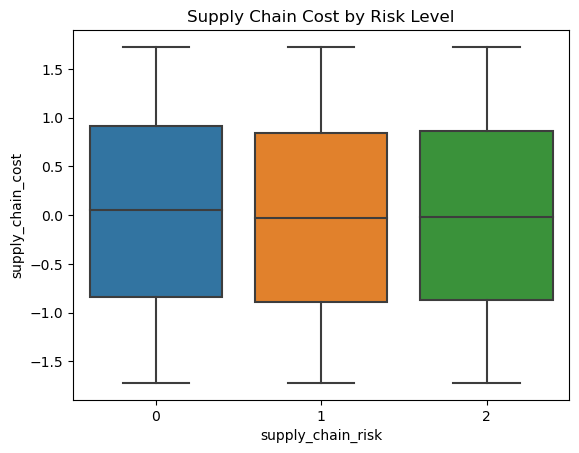

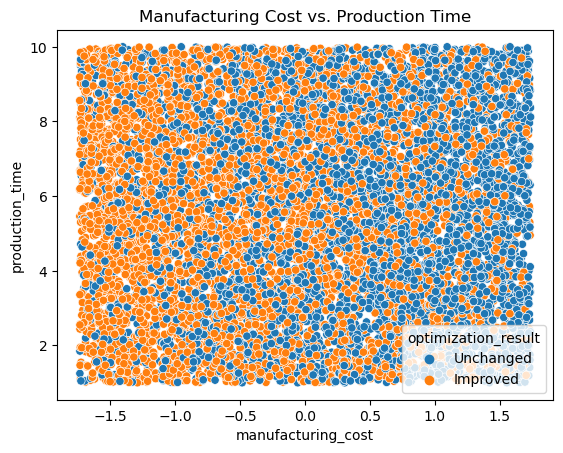

In [35]:
# Visualize key metrics using Seaborn/Matplotlib
sns.boxplot(x='supply_chain_risk', y='supply_chain_cost', data=df)
plt.title('Supply Chain Cost by Risk Level')
plt.show()

sns.scatterplot(x='manufacturing_cost', y='production_time', hue='optimization_result', data=df)
plt.title('Manufacturing Cost vs. Production Time')
plt.show()
